# Host classification using K-nearest neighbor classifier

In this notebook, we are going to perform KNN classification on dataset with hosts from **2 units within subnet**

## Imports

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import dataset

We are using pickled preprocessed dataframe of host network behaviour 

In [2]:
df = pd.read_pickle('balanced_preprocessed_dataset.pkl')
df.head()

mean                                                              \
  FlowDuration                                                               
            00        01        02        03        04        05        06   
0    -0.007622 -0.006103 -0.009019 -0.006422 -0.012099 -0.007141 -0.007069   
1    -0.009677 -0.011074 -0.010790 -0.008082 -0.013610 -0.009863 -0.009743   
2    -0.009484 -0.010427 -0.010896 -0.008080 -0.013609 -0.009918 -0.009838   
3    -0.009932 -0.011126 -0.010762 -0.007984 -0.013595 -0.009918 -0.009470   
4    -0.007484 -0.005790 -0.008930 -0.006322 -0.012029 -0.007007 -0.006911   

                                     ...            max                      \
                                     ...          Bytes                       
         07        08        09      ...             19        20        21   
0 -0.012616 -0.009572 -0.011851      ...      -0.015290 -0.014971 -0.016604   
1 -0.014340 -0.011510 -0.014119      ...      -0.015291 -0.014971 -0.016604   
2 -0.014320 -0.011545 -0.013922      ...      -0.015291 -0.014971 -0.016604   
3 -0.014341 -0.011979 -0.014230      ...      -0.015291 -0.014971 -0.016604   
4 -0.012538 -0.009441 -0.011706      ...      -0.015274 -0.014955 -0.016588   

                               Label  \
                               Label   
         22        23 anon_net_range   
0 -0.016766 -0.016320             28   
1 -0.016766 -0.016320             28   
2 -0.016766 -0.016320             28   
3 -0.016766 -0.016320             28   
4 -0.016752 -0.016307             26   

                                                              \
                                                               
                                          addr_range    unit   
0  ef160f55b36bd48b37f22bc9c48819b1a0259c2dd27ccc...  CEITEC   
1  93b8f5a052053b0db4731b671f78b8c5e5817d38d51ba9...  CEITEC   
2  ac600c8985d0f198d532737ea9d58db00905c6c6bebb6b...  CEITEC   
3  48bab257d30b1c6eaa225275fe60fc5e1dfe61afe54ace...  CEITEC   
4  1cd00c373ace404b829e822bf076631b564bf2bc70db82...  CEITEC   

                                                     Unit_encoding  
                                                                    
                                             subunit                
0   frontendy diskovych poli a aplikacni servery ...             0  
1   frontendy diskovych poli a aplikacni servery ...             0  
2   frontendy diskovych poli a aplikacni servery ...             0  
3   frontendy diskovych poli a aplikacni servery ...             0  
4                                                CRS             0  

[5 rows x 653 columns]

In [3]:
df['Label', 'Label', 'unit'].value_counts()

UVT              3500
SKM              3246
PrirF            2599
CEITEC           2223
LF               1475
FI               1289
FF               1089
FIeduroamnaFI    1020
FSS               802
PedF              740
UKB               649
ESF               554
PravF             536
RMU               429
FSpS              410
Teiresias         130
Telc               99
IBA                96
VPN                83
CTT                19
FNBrno              7
CESNET              3
Name: (Label, Label, unit), dtype: int64

## Preprocessing

#### We are only going to classify UVT and SKM hosts

In [4]:
df = df[df['Label', 'Label', 'unit'].isin(['UVT', 'SKM'])]

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Unit_encoding'] = le.fit_transform(df['Label', 'Label', 'unit'].astype(str))
df.head()

mean                                                    \
      FlowDuration                                                     
                00        01        02        03        04        05   
13291    -0.007496 -0.005742 -0.008903 -0.006316 -0.012004 -0.006973   
13292    -0.008895 -0.008315 -0.010002 -0.006953 -0.012740 -0.008184   
13293    -0.007623 -0.006104 -0.009037 -0.006413 -0.012109 -0.007140   
13294    -0.007596 -0.006030 -0.009027 -0.006398 -0.012092 -0.007123   
13295    -0.008925 -0.009641 -0.010201 -0.007432 -0.012726 -0.008296   

                                                   ...            max  \
                                                   ...          Bytes   
             06        07        08        09      ...             19   
13291 -0.006919 -0.012518 -0.009461 -0.011721      ...      -0.015274   
13292 -0.008276 -0.013226 -0.010829 -0.012773      ...      -0.015291   
13293 -0.007082 -0.012616 -0.009489 -0.011722      ...      -0.015289   
13294 -0.007039 -0.012571 -0.009517 -0.011771      ...      -0.014638   
13295 -0.008540 -0.013556 -0.010859 -0.013467      ...      -0.015291   

                                                       Label  \
                                                       Label   
             20        21        22        23 anon_net_range   
13291 -0.014957 -0.016592 -0.016750 -0.016306             24   
13292 -0.014971 -0.016604 -0.016766 -0.016320             24   
13293 -0.014950 -0.016603 -0.016765 -0.016319             24   
13294 -0.014446 -0.016041 -0.016122 -0.016018             24   
13295 -0.014971 -0.016604 -0.016766 -0.016320             24   

                                                               \
                                                                
                                              addr_range unit   
13291  a8ce8c3977ebd10bba6849d15645105eed4d5e78006cfb...  SKM   
13292  5a5fa9cbb0325b8b154b37dfee873af049c3f7fbad8141...  SKM   
13293  0eb624c7b418aec4d9779fe9a69f171a3c452e8a163e96...  SKM   
13294  8d2375a96a2a821d927c290ed665767957ffbbdc55e547...  SKM   
13295  ceab45b2cd2a4b0f2af9c73236e4fe98f1bcd1ca8b3bff...  SKM   

                          Unit_encoding  
                                         
                  subunit                
13291   centrum Slapanice             0  
13292   centrum Slapanice             0  
13293   centrum Slapanice             0  
13294   centrum Slapanice             0  
13295   centrum Slapanice             0  

[5 rows x 653 columns]

## Dividing dataset into train/test split

In [6]:
from sklearn.model_selection import train_test_split
x = df.drop(['Label', 'Unit_encoding'], level=0, axis=1)
y = df['Unit_encoding']
x.head()

mean                                                    \
      FlowDuration                                                     
                00        01        02        03        04        05   
13291    -0.007496 -0.005742 -0.008903 -0.006316 -0.012004 -0.006973   
13292    -0.008895 -0.008315 -0.010002 -0.006953 -0.012740 -0.008184   
13293    -0.007623 -0.006104 -0.009037 -0.006413 -0.012109 -0.007140   
13294    -0.007596 -0.006030 -0.009027 -0.006398 -0.012092 -0.007123   
13295    -0.008925 -0.009641 -0.010201 -0.007432 -0.012726 -0.008296   

                                                 ...          max            \
                                                 ...        Bytes             
             06        07        08        09    ...           14        15   
13291 -0.006919 -0.012518 -0.009461 -0.011721    ...    -0.018114 -0.017923   
13292 -0.008276 -0.013226 -0.010829 -0.012773    ...    -0.018135 -0.017942   
13293 -0.007082 -0.012616 -0.009489 -0.011722    ...    -0.017943 -0.017941   
13294 -0.007039 -0.012571 -0.009517 -0.011771    ...    -0.017672 -0.017679   
13295 -0.008540 -0.013556 -0.010859 -0.013467    ...    -0.018135 -0.017942   

                                                                             \
                                                                              
             16        17        18        19        20        21        22   
13291 -0.017517 -0.017624 -0.015950 -0.015274 -0.014957 -0.016592 -0.016750   
13292 -0.017531 -0.017641 -0.015971 -0.015291 -0.014971 -0.016604 -0.016766   
13293 -0.017526 -0.017639 -0.015971 -0.015289 -0.014950 -0.016603 -0.016765   
13294 -0.017014 -0.017126 -0.015627 -0.014638 -0.014446 -0.016041 -0.016122   
13295 -0.017531 -0.017641 -0.015971 -0.015291 -0.014971 -0.016604 -0.016766   

                 
                 
             23  
13291 -0.016306  
13292 -0.016320  
13293 -0.016319  
13294 -0.016018  
13295 -0.016320  

[5 rows x 648 columns]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Apply KNN

In [8]:
k = 3 # usually a good starting point

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
prediction = knn.predict(x_test)

## Evaluate KNN performance

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       665
           1       0.93      0.95      0.94       685

   micro avg       0.93      0.93      0.93      1350
   macro avg       0.94      0.93      0.93      1350
weighted avg       0.93      0.93      0.93      1350



In [13]:
print(confusion_matrix(y_test, prediction))

[[614  51]
 [ 37 648]]


## Trying various K values

We are going to plot k values against the error rate, to see if lower/higher k value can improve the classifier accuracy 

In [14]:
error_rate = []
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.20)
k = 20
for i in range(1,k+1):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    unit_prediction_i = knn.predict(x_test)
    error_rate.append(np.mean(unit_prediction_i != y_test))
    print('K value of: ' + str(i) + ', error rate: ' + str(error_rate[i - 1]))

K value of: 1, error rate: 0.07777777777777778
K value of: 2, error rate: 0.07333333333333333
K value of: 3, error rate: 0.06
K value of: 4, error rate: 0.0637037037037037
K value of: 5, error rate: 0.06222222222222222
K value of: 6, error rate: 0.06666666666666667
K value of: 7, error rate: 0.06518518518518518
K value of: 8, error rate: 0.06814814814814815
K value of: 9, error rate: 0.06888888888888889
K value of: 10, error rate: 0.0674074074074074
K value of: 11, error rate: 0.06888888888888889
K value of: 12, error rate: 0.07111111111111111
K value of: 13, error rate: 0.0674074074074074
K value of: 14, error rate: 0.06888888888888889
K value of: 15, error rate: 0.0674074074074074
K value of: 16, error rate: 0.0674074074074074
K value of: 17, error rate: 0.06814814814814815
K value of: 18, error rate: 0.07037037037037037
K value of: 19, error rate: 0.07111111111111111
K value of: 20, error rate: 0.0674074074074074


## Plotting error rate graph

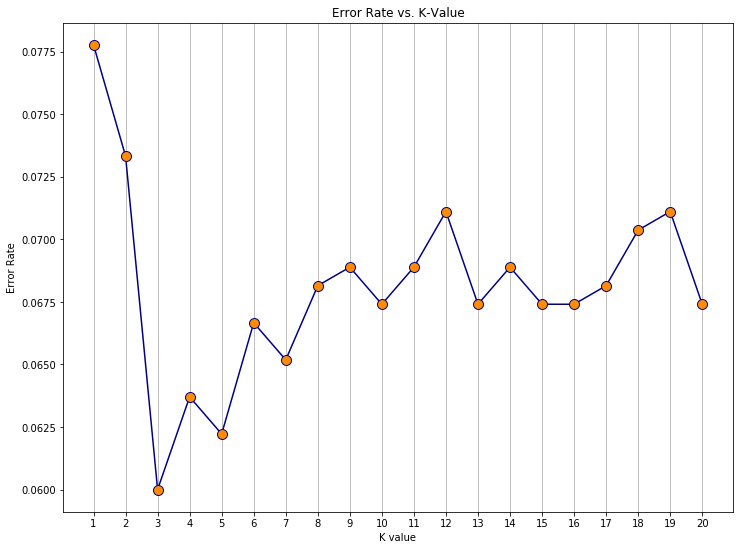

In [16]:
plt.figure(figsize=(12,9))
plt.plot(range(1,k+1),error_rate, color='navy', linestyle='solid', marker='o',
         markerfacecolor='darkorange', markersize=10)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.xticks(np.linspace(1, 20, 20))
plt.grid(b=True, which='major', axis='x')